In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import difflib
from cdifflib import CSequenceMatcher
from sklearn.dummy import DummyClassifier
from tqdm import tqdm
import cv2
import imutils
from itertools import zip_longest


In [2]:
difflib.SequenceMatcher = CSequenceMatcher

In [3]:
# Load the MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X, y), (Xt, yt) =  fashion_mnist.load_data()

In [4]:
Xo=X.reshape((-1, 28* 28)).astype('float32') #/ 255.0
Xto=Xt.reshape((-1, 28* 28)).astype('float32')# / 255.0

In [5]:
# Preprocess the data
train_images = X.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
test_images = Xt.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
train_labels = tf.keras.utils.to_categorical(y, 10)
test_labels = tf.keras.utils.to_categorical(yt, 10)

### Methods to assess the performance of each classifier

As stated, the idea of implementing a polynomial classifier was set; however, to assess the polynomial classifier objectively a direct comparison between the polynomial classifier and other machine learning methods is necessary. For this reason, a classification report as well as the confusion matrix for each classifier is a coded method.

In [6]:
def sk_metrics(y_test,prediction_test,x_test,clf):

    print('Testing set')
    print('===========')
    print(classification_report(y_test, prediction_test, zero_division=0))
    # confusion matrix
    ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, values_format='.0f')
    plt.show()

In [7]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(Xo, y)
preds = dummy_clf.predict(Xto)

Testing set
              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



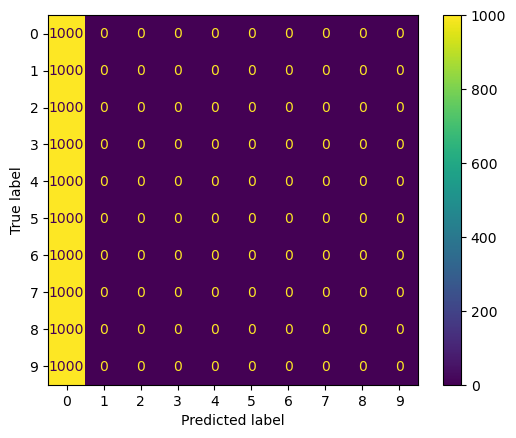

In [8]:
sk_metrics(yt,preds,Xto,dummy_clf)

In [15]:
class D2MVF(object):
    def __init__(self, valid_data, eval_data,w = None, val_size= 0,epoch = 1):
        super(object, self).__init__()
        self.validation_data = valid_data
        self.evaluation_data = eval_data
        self.deg = w
        self.epoch = epoch
        self.val = val_size
        
    def ds_rot(self,images,deg):
        xD= []
        for i in images:
            rotated = imutils.rotate(i, deg)
            xD.append(rotated)
        return xD

    def separate(self,imp,lotion):
        T = []
        Y0,X0 = self.evaluation_data,self.validation_data 
        
        for x in range(len(set(Y0))):
            T.append([])
            
        for x,i in enumerate(Y0):
            T[i].append(lotion[x])
            
        return T

    def aHa(self,error,test): 
        return np.round(np.max([CSequenceMatcher(None,t,test).ratio() for t in error]),4)
    

    def P1(self,Xk):
        res = []
        for j,k in enumerate(Xk):
            M = []
            for i,l in enumerate(k):
                if l != 0: M.append(i)
                else: M.append(0)
            res.append(M)
        return res
        
    def P2(self,Xk):
        res = []
        for j,k in enumerate(Xk):
            M = []
            for i,l in enumerate(k):
                if l == 0: M.append(i)
                else: M.append(0)
            res.append(M)
        return res
    
    def P3(self,Xk):
        res = []
        for j,k in enumerate(Xk):
            M = []
            for i,l in enumerate(k):
                if l != 0: M.append(1)
                else: M.append(0)
            res.append(M)
        return res
        
    def P4(self,Xk):
        res = []
        for j,k in enumerate(Xk):
            M = []
            for i,l in enumerate(k):
                if l == 0: M.append(1)
                else: M.append(0)
            res.append(M)
        return res
    
    
    def classify(self,train_data,test_data):
        arr,X0,Y0 = set(self.evaluation_data),train_data,self.evaluation_data
  
        Xj,Xi,Xk,Xkij= self.P1(X0), self.P2(X0), self.P3(X0), self.P4(X0)
        test_data_j,test_data_i,test_data_k,test_data_kij = self.P1(test_data),self.P2(test_data),self.P3(test_data),self.P4(test_data)
        
        train_x = []
        for i,j in enumerate(X0):
            a,b,c,d = Xi[i],Xj[i],Xk[i],Xkij[i]
            matrix =[a,b,c]
            flat = [x for row in matrix for x in row]
            train_x.append(flat)
        hoc = self.separate(X0,train_x)
        
        test_x = []
        for i,j in enumerate(test_data):        
            a,b,c,d = test_data_i[i],test_data_j[i], test_data_k[i],test_data_kij[i]
            matrix =[a,b,c]
            flat = [x for row in matrix for x in row]
            test_x.append(flat)
        
        lala,land = [],[]
        for al8da in tqdm(range(len(test_x)),ascii=' >=',bar_format='{desc:<5.5}{percentage:3.0f}%|{bar:50}{r_bar}'):
            mos = []
            for ad in range(len(arr)):
                ris = self.aHa(hoc[ad],test_x[al8da])
                mos.append(ris)
            land.append(np.argmax(mos))
            lala.append(mos)
        return lala
        
    def nulify(self,test_data):
        d = self.deg
        X0 = self.validation_data
        s = []
        for i in d:
            XxX = X0.reshape((-1, 28, 28)).astype('float32')
            X1 = np.array(self.ds_rot(XxX,i))
            xXx =  test_data.reshape((-1, 28, 28)).astype('float32')
            Xt1 = np.array(self.ds_rot(xXx,i))

            Xo1=X1.reshape((-1, 28* 28)).astype('float32') #/ 255.0
            Xto1=Xt1.reshape((-1, 28* 28)).astype('float32')# / 255.0
            prs = self.classify(Xo1,Xto1)
            s.append(prs)
            
        pred = []
        for e in range(len(s)):
            prd = []
            for x in range(len(s[e])):
                prd.append(s[e][x])
            pred.append(prd)
            
        preds = []
        for x,y in enumerate(d):
            xt,tz = [],[]
            for z,w in enumerate(pred[x]):
                xt.append(np.max(w))
                tz.append(np.argmax(w))
            preds.append(np.array([xt,tz]).T)
        return np.array(preds).T

    
    def train(self,test_data):
        predications = self.nulify(test_data)
        prediactions = []
        for m,l in enumerate(predications[0]):
            prediactions.append(np.argmax(l))
        c_c = np.array(predications[1])
        c3301a = []
        for a,k in enumerate(c_c):
         #   print(a)
            c,v = np.unique(k,return_counts=True)
            if len(c) == len(k): c3301a.append(int(k[prediactions[a]]))
            else:c3301a.append(int(c[np.argmax(v)]))
        return c3301a
        
    def _predict(self,test_data,test_labels):
        c3301a = self.train(test_data)
        blac_list = []
        for i,d in enumerate(c3301a):
            if not d == test_labels[i]: blac_list.append(i)
            else: blac_list.append(-1)
        return blac_list
        
    def discard(self,test_data,test_labels):
        blite = self._predict(test_data,test_labels)
        whack,bleen = [],[]
        for i in range(len(blite)):
            if blite[i] == -1: # ==
                bleen.append(test_labels[i])
                whack.append(test_data[i])
        return whack,bleen

    def keep(self,test_data,test_labels):
        blite = self._predict(test_data,test_labels)
        grue,whack = [],[]
        for i in range(len(blite)):
            if blite[i] != -1: # ==
                grue.append(test_labels[i])
                whack.append(test_data[i])
        return whack,grue

    def predict(self,train_x,train_y,test_data,size):
        if self.epoch == 1:
            sample = self.val
            x,y,z,w = train_x[:sample],train_y[:sample],train_x[sample:sample+size],train_y[sample:sample+size]
            self.__init__(x,y,self.deg)
            XY = self.discard(z,w) # keep
            Xn, yn= np.vstack((x,XY[0])),np.hstack((y,XY[1]))
            self.__init__(Xn,yn,self.deg)
            return self.train(test_data)
        if self.epoch != 1:
            for i in range(self.epoch):
                print('Iteration: ',i+1,'/',self.epoch)
                sample = self.val
                x,y,z,w = train_x[:sample],train_y[:sample],train_x[sample:sample+size],train_y[sample:sample+size]
                self.__init__(x,y,self.deg,sample,self.epoch)
                XY = self.discard(z,w)
                Xn, yn= np.vstack((x,XY[0])),np.hstack((y,XY[1]))
                print(len(yn))
                self.__init__(Xn,yn,self.deg,len(yn),self.epoch)
            return self.train(test_data)


    
    def split_list(self,lst, chunk_size):
        return list(zip_longest(*[iter(lst)] * chunk_size, fillvalue=None))
    
    def samples(self,train_x,train_y,test_data,size,sub):
        x,y = train_x[:size],train_y[:size]
        print(size)
        print(len(y),sub)
        z,w = self.split_list(y,sub),self.split_list(x,sub)
        z = [i for i in z]
        w =  [i for i in w]
        v = []
        for x,i in enumerate(w):
            #print(np.shape(i),np.shape(z[x]))
            self.__init__(np.array(w[x]),np.array(z[x]),self.deg,0,self.epoch)
            v.append(self.train(test_data))

        v = np.array(v).T
        c3301a = []
        for a,k in enumerate(v):
         #   print(a)
            c,u = np.unique(k,return_counts=True)
       #     print(c,u)
            if len(c) == len(k):c3301a.append(int(c[np.argmax(u)]))
            else:c3301a.append(int(c[np.argmax(u)]))
        return c3301a

In [ ]:
########
rt = 200
arrs = 125
tr = 1000
epoch = 1

AK = D2MVF(Xo,y,[0,180,270],tr,epoch)
preds = AK.samples(Xo,y,Xto[:rt],tr,arrs)

1000
1000 125


       9%|====>                                             | 18/200 [00:02<00:20,  8.74it/s]

In [ ]:
preds
print('Testing set')
print('VV_______VV')
print(classification_report(yt[:rt], preds))

# test: confusion matrix
cf_matrix = confusion_matrix(yt[:rt], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

In [ ]:
########
rt = 100
batch = 50
tr = 250
epoch = 2

AK = D2MVF(Xo,y,[0],tr,epoch)
preds = AK.predict(Xo,y,Xto[:rt],batch)
print('Testing set')
print('VV_______VV')
print(classification_report(yt[:rt], preds))

# test: confusion matrix
cf_matrix = confusion_matrix(yt[:rt], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()

Iteration:  1 / 2


     100%|==================================================| 50/50 [00:13<00:00,  3.80it/s]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
283 (283, 784)
Iteration:  2 / 2


      20%|==========                                        | 10/50 [00:03<00:11,  3.34it/s]

In [ ]:
rt = 100
tr = 570
batch = 1
AK = D2MVF(Xo[:tr],y[:tr],[0,180,270])
preds = AK.predict(Xo,y,Xto[:rt],batch)
print('Testing set')
print('VV_______VV')
print(classification_report(yt[:rt], preds))

# test: confusion matrix
cf_matrix = confusion_matrix(yt[:rt], preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,)
cm_display.plot()
plt.show()